# Assignment 3 - People's EMail Domains Pie Chart

### Authored by: Stephen Kerr


In [1]:
# import pandas for data manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt


In [2]:
# import the data as a Dataframe

df = pd.read_csv('https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [4]:
# adding the domain column by extracting from the email column
df['Domain'] = df['Email'].str.split('@').str[1]

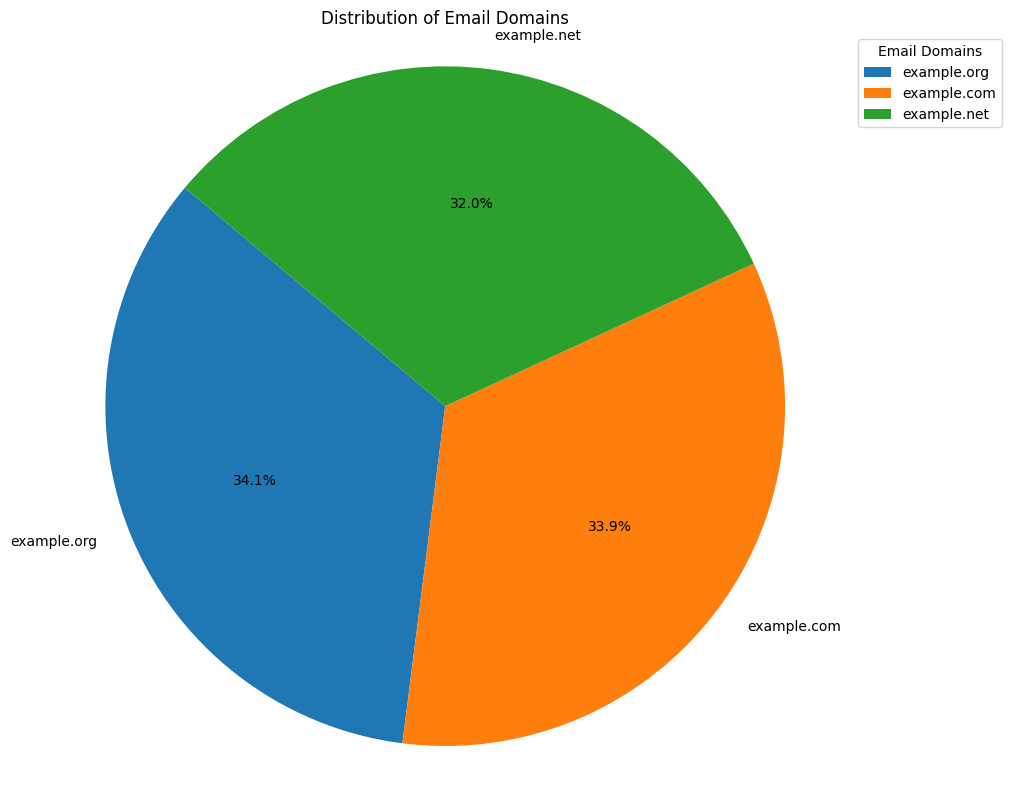

In [ ]:
# create a pie chart of the distribution of email domains
domain_counts = df['Domain'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Email Domains')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Email Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()